NameError: name 'energy_file2' is not defined

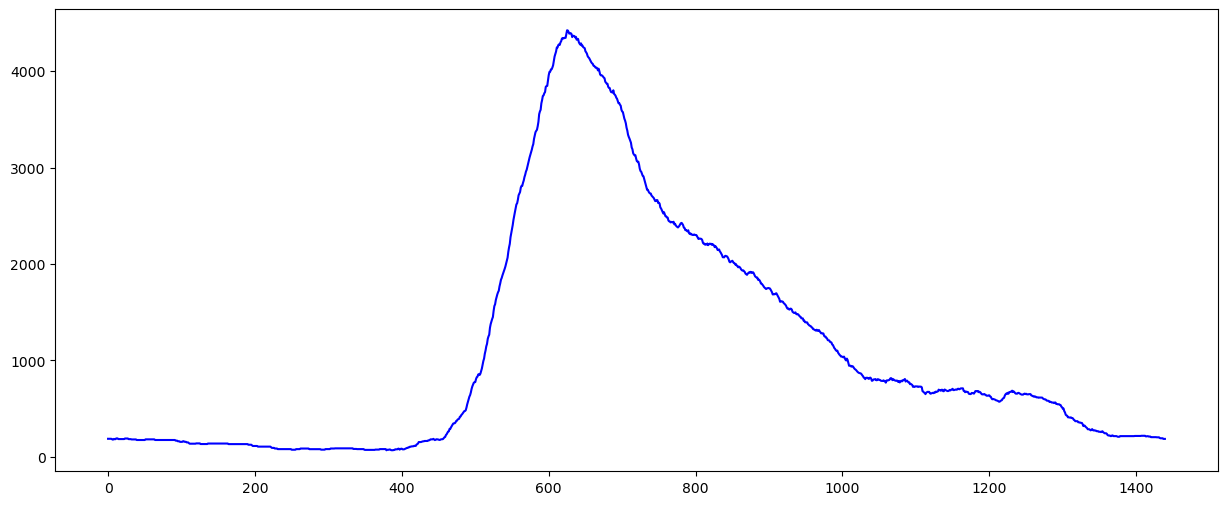

In [2]:
import pandas as pd
import pytz
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Define time zones
gmt_tz = pytz.timezone("GMT")
pst_tz = pytz.timezone("US/Pacific")

# Function to process each CSV file
def process_csv(file_path):
    # Load CSV
    df = pd.read_csv(file_path)

    # Parse timestamps as UTC (since GMT is equivalent to UTC)
    df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')
    df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], utc=True, errors='coerce')

    # Convert from UTC (GMT) to Pacific Time, handling daylight savings
    df['connectionTime'] = df['connectionTime'].dt.tz_convert(pst_tz)
    df['disconnectTime'] = df['disconnectTime'].dt.tz_convert(pst_tz)
    df['doneChargingTime'] = df['doneChargingTime'].dt.tz_convert(pst_tz)

    # Drop rows with missing timestamps or kWhDelivered
    df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered','doneChargingTime'])

    # Create vectors for energy and count per minute
    minutes_in_day = 24 * 60
    energy_per_minute = np.zeros(minutes_in_day)
    count_per_minute = np.zeros(minutes_in_day)
    energysessionlist = []

    # Process each session
    for _, row in df.iterrows():
        start = row['connectionTime']
        end = row['doneChargingTime']
        energy = row['kWhDelivered']
        
        if end <= start:
            continue  # Skip invalid sessions

        # Spread energy evenly over session duration
        duration_minutes = int((end - start).total_seconds() / 60)
        if duration_minutes == 0:
            continue

        energy_per_session_minute = energy / (duration_minutes / 60)
        energysessionlist.append(energy_per_session_minute)
        for i in range(duration_minutes):
            minute_time = start + timedelta(minutes=i)
            minute_of_day = minute_time.hour * 60 + minute_time.minute
            energy_per_minute[minute_of_day] += energy_per_session_minute
            count_per_minute[minute_of_day] += 1

    return energy_per_minute

# Process the three CSV files
energy_file1 = process_csv("acndata_sessions 2019_11 till 2020_5 caltech.csv")
#energy_file2 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 jpl.csv")  # Replace with actual file path
#energy_file3 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 office1.csv")   # Replace with actual file path

# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot the three energy curves on the same plot
plt.figure(figsize=(15, 6))
plt.plot(energy_file1, color='blue', label='Caltech', linewidth=1.5)
plt.plot(energy_file2, color='green', label='JPL', linewidth=1.5)
plt.plot(energy_file3, color='red', label='Office 1', linewidth=1.5)

# Customize the plot
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day (PST)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


[3.13101562 3.13101562 3.13101562 ... 3.11044948 3.11044948 3.11044948]
[47. 47. 47. ... 48. 48. 48.]


C:\Users\thijs\AppData\Local\Temp\ipykernel_49700\378706563.py:14: DtypeWarning: Columns (169,170,171,177,178,179,185,186,187) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


[2.92006955 2.92006955 2.83853048 ... 2.92006955 2.92006955 2.92006955]
[45. 45. 43. ... 45. 45. 45.]
[0.02682325 0.02682325 0.02682325 ... 0.02682325 0.02682325 0.02682325]
[1. 1. 1. ... 1. 1. 1.]


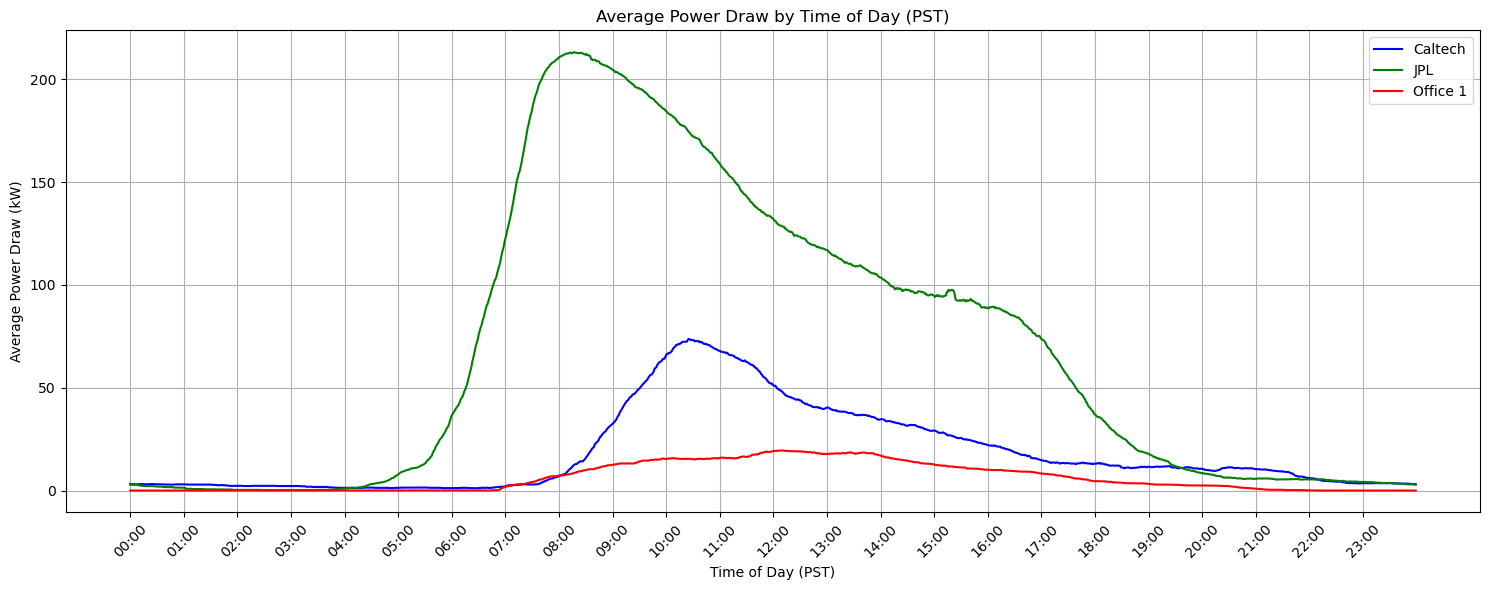

In [2]:
import pandas as pd
import pytz
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Define time zones
gmt_tz = pytz.timezone("GMT")
pst_tz = pytz.timezone("US/Pacific")

# Function to process each CSV file
def process_csv(file_path):
    # Load CSV
    df = pd.read_csv(file_path)

    # Parse timestamps as UTC (since GMT is equivalent to UTC)
    df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')
    df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], utc=True, errors='coerce')

    # Convert from UTC (GMT) to Pacific Time, handling daylight savings
    df['connectionTime'] = df['connectionTime'].dt.tz_convert(pst_tz)
    df['disconnectTime'] = df['disconnectTime'].dt.tz_convert(pst_tz)
    df['doneChargingTime'] = df['doneChargingTime'].dt.tz_convert(pst_tz)

    # Drop rows with missing timestamps or kWhDelivered
    df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered','doneChargingTime'])

    # Create vectors for energy and count per minute
    minutes_in_day = 24 * 60
    energy_per_minute = np.zeros(minutes_in_day)
    count_per_minute = np.zeros(minutes_in_day)
    energysessionlist = []

    # Process each session
    for _, row in df.iterrows():
        start = row['connectionTime']
        end = row['doneChargingTime']
        energy = row['kWhDelivered']
        
        if end <= start:
            continue  # Skip invalid sessions

        # Spread energy evenly over session duration
        duration_minutes = int((end - start).total_seconds() / 60)
        if duration_minutes == 0:
            continue

        energy_per_session_minute = energy / duration_minutes
        energysessionlist.append(energy_per_session_minute)
        for i in range(duration_minutes):
            minute_time = start + timedelta(minutes=i)
            minute_of_day = minute_time.hour * 60 + minute_time.minute
            energy_per_minute[minute_of_day] += energy_per_session_minute
            count_per_minute[minute_of_day] += 1
    print(energy_per_minute)
    print(count_per_minute)
    return energy_per_minute

# Process the three CSV files
energy_file1 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")
energy_file2 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 jpl.csv")  # Replace with actual file path
energy_file3 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 office1.csv")   # Replace with actual file path

# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot the three energy curves on the same plot
plt.figure(figsize=(15, 6))
plt.plot(energy_file1, color='blue', label='Caltech', linewidth=1.5)
plt.plot(energy_file2, color='green', label='JPL', linewidth=1.5)
plt.plot(energy_file3, color='red', label='Office 1', linewidth=1.5)

# Customize the plot
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day (PST)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
def plotter(file_path):
    df = pd.read_csv(file_path)

    df['date_only'] = df['connectionTime'].str.split(' ', n=3).str[1] + ' ' + df['connectionTime'].str.split(' ', n=3).str[2] + ' ' + df['connectionTime'].str.split(' ', n=3).str[3].str.split(' ', n=1).str[0]

    # Define time zones
    gmt_tz = pytz.timezone("GMT")
    pst_tz = pytz.timezone("US/Pacific")

    # Parse timestamps as UTC (since GMT is equivalent to UTC)
    df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')
    df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], utc=True, errors='coerce')

    # Convert from UTC (GMT) to Pacific Time, handling daylight savings
    df['connectionTime'] = df['connectionTime'].dt.tz_convert(pst_tz)
    df['disconnectTime'] = df['disconnectTime'].dt.tz_convert(pst_tz)
    df['doneChargingTime'] = df['doneChargingTime'].dt.tz_convert(pst_tz)

    # Drop rows with missing timestamps or kWhDelivered
    df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered'])

    df['connectionTime'] = pd.to_datetime(df['connectionTime'])
    df['connectionTime'] = df['connectionTime'].dt.hour + df['connectionTime'].dt.minute / 60 + df['connectionTime'].dt.second / 3600

    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'])
    df['disconnectTime'] = df['disconnectTime'].dt.hour + df['disconnectTime'].dt.minute / 60 + df['disconnectTime'].dt.second / 3600

    df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'])
    df['doneChargingTime'] = df['doneChargingTime'].dt.hour + df['doneChargingTime'].dt.minute / 60 + df['doneChargingTime'].dt.second / 3600

    # Drop rows with missing timestamps or kWhDelivered
    df = df.dropna(subset=['connectionTime', 'disconnectTime','doneChargingTime','kWhDelivered'])
    df['load'] = (df['doneChargingTime'] - df['connectionTime']) / df['kWhDelivered']

    df['connectionTime'] = df['connectionTime']*60
    df['disconnectTime'] = df['disconnectTime']*60
    df['doneChargingTime'] = df['doneChargingTime']*60

    df['connectionTime'] = df['connectionTime'].astype(int)
    df['disconnectTime'] = df['disconnectTime'].astype(int)
    df['doneChargingTime'] = df['doneChargingTime'].astype(int)

    df = df.reset_index(drop=True)

    my_dict = {}
    keys = list(set(df['date_only'].to_list()))
    for i in range(len(keys)):
        my_dict[keys[i]] = [0] * 1440

    maxlist = [0] * 1440

    for i in range(0, len(df)):
        key = df.loc[i,'date_only']
        for j in range(df.loc[i,'connectionTime'], df.loc[i, 'doneChargingTime']):
            my_dict[key][j] += df.loc[i,'load']

    for i in range(0, 1440):
        for j in keys:
            value = my_dict[j][i]
            if value > maxlist[i]:
                maxlist[i] = value

    averagelist = []
    for i in range(0, 1440):
        listx = []
        for j in keys:
            listx.append(my_dict[j][i])
        filtered_listx = [x for x in listx if x != 0]
        if len(filtered_listx) == 0:
            averagelist.append(0)
        else:
            averagelist.append(sum(filtered_listx) / len(filtered_listx))
        #print(listx)
        #print(filtered_listx)
    display(df)
    return averagelist, maxlist

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,userInputs/9/WhPerMile,userInputs/9/kWhRequested,userInputs/9/milesRequested,userInputs/9/minutesAvailable,userInputs/9/modifiedAt,userInputs/9/paymentRequired,userInputs/9/requestedDeparture,userInputs/9/userID,date_only,load
0,5dd1f434f9af8b2dec17805f,39,431,507,507,4.279,2_39_89_25_2019-11-01 14:11:13.813067,2,CA-315,2-39-89-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.295175
1,5dd1f434f9af8b2dec178060,39,463,996,684,11.769,2_39_90_26_2019-11-01 14:43:04.819121,2,CA-316,2-39-90-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.313701
2,5dd1f434f9af8b2dec178061,39,472,834,772,0.889,2_39_139_28_2019-11-01 14:52:02.094336,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,5.626797
3,5dd1f434f9af8b2dec178062,39,504,739,739,13.430,2_39_78_366_2019-11-01 15:24:51.692724,2,CA-323,2-39-78-366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.290767
4,5dd1f434f9af8b2dec178063,39,539,967,759,12.001,2_39_79_383_2019-11-01 15:59:04.798455,2,CA-492,2-39-79-383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.305808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,5ed1a90bf9af8b32e9f098e3,39,610,741,741,14.939,2_39_127_19_2020-05-13 17:10:07.807386,2,CA-309,2-39-127-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 May 2020,0.146466
3226,5ed59d8bf9af8b757dd700ba,39,611,1211,1069,48.878,2_39_131_30_2020-05-16 17:11:22.543804,2,CA-305,2-39-131-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 May 2020,0.156069
3227,5ee2cc8df9af8b67c338cd47,39,786,937,938,0.820,2_39_139_28_2020-05-26 20:06:06.399729,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 May 2020,3.090108
3228,5ee2cc8df9af8b67c338cd48,39,937,947,947,0.544,2_39_139_28_2020-05-26 22:37:29.854698,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 May 2020,0.301266


C:\Users\thijs\AppData\Local\Temp\ipykernel_49700\4132874728.py:2: DtypeWarning: Columns (169,170,171,177,178,179,185,186,187) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,userInputs/21/WhPerMile,userInputs/21/kWhRequested,userInputs/21/milesRequested,userInputs/21/minutesAvailable,userInputs/21/modifiedAt,userInputs/21/paymentRequired,userInputs/21/requestedDeparture,userInputs/21/userID,date_only,load
0,5dd0a2e1f9af8b29ea6a39d7,1,1314,149,3,5.589,1_1_178_823_2019-11-01 04:54:57.634769,1,AG-1F08,1-1-178-823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,-3.911801
1,5dd1f471f9af8b2dec178087,1,248,815,422,9.369,1_1_194_821_2019-11-01 11:08:51.993340,1,AG-1F13,1-1-194-821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.309383
2,5dd1f471f9af8b2dec178088,1,303,990,442,6.351,1_1_193_825_2019-11-01 12:03:30.723021,1,AG-1F01,1-1-193-825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.365209
3,5dd1f471f9af8b2dec178089,1,337,948,731,15.906,1_1_194_822_2019-11-01 12:37:30.956658,1,AG-1F12,1-1-194-822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.412982
4,5dd1f471f9af8b2dec17808a,1,350,762,596,20.012,1_1_179_799_2019-11-01 12:50:03.824963,1,AG-3F25,1-1-179-799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.205224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,5ee6c114f9af8b6de7a246a9,1,757,953,788,0.734,1_1_179_788_2020-05-29 19:38:22.673846,1,AG-3F22,1-1-179-788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29 May 2020,0.699364
6451,5ee6c114f9af8b6de7a246aa,1,769,937,936,17.300,1_1_178_824_2020-05-29 19:49:27.155632,1,AG-1F07,1-1-178-824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29 May 2020,0.161400
6452,5ee6c114f9af8b6de7a246ab,1,802,878,878,6.752,1_1_193_820_2020-05-29 20:21:59.624782,1,AG-1F04,1-1-193-820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29 May 2020,0.188504
6453,5ee6c114f9af8b6de7a246ac,1,882,1307,1025,13.484,1_1_178_828_2020-05-29 21:41:54.667653,1,AG-1F10,1-1-178-828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29 May 2020,0.177350


,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,userInputs/6/WhPerMile,userInputs/6/kWhRequested,userInputs/6/milesRequested,userInputs/6/minutesAvailable,userInputs/6/modifiedAt,userInputs/6/paymentRequired,userInputs/6/requestedDeparture,userInputs/6/userID,date_only,load
0,5dd1f41ef9af8b2deaac58c8,102,433,982,551,12.260,19_102_260_1635_2019-11-01 14:13:25.539059,19,1,19-102-260-1635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.160776
1,5dd1f41ef9af8b2deaac58c9,102,444,920,836,34.153,19_102_260_1633_2019-11-01 14:24:29.364122,19,2,19-102-260-1633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.191507
2,5dd1f41ef9af8b2deaac58ca,102,490,799,606,5.844,19_102_260_1634_2019-11-01 15:10:38.255284,19,3,19-102-260-1634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.330396
3,5dd1f41ef9af8b2deaac58cb,102,588,688,688,10.801,19_102_260_1637_2019-11-01 16:48:06.200767,19,7,19-102-260-1637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.154847
4,5dd1f41ef9af8b2deaac58cc,102,625,732,732,5.703,19_102_260_1640_2019-11-01 17:25:02.756655,19,8,19-102-260-1640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Nov 2019,0.314552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,5ee2cc8df9af8b67c2c3fc06,102,826,916,916,8.842,19_102_260_1640_2020-05-26 20:46:32.278478,19,8,19-102-260-1640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 May 2020,0.168859
541,5ee56f8cf9af8b6bb1262f2e,102,502,1042,844,26.174,19_102_260_1639_2020-05-28 15:22:48.807310,19,5,19-102-260-1639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28 May 2020,0.217795
542,5ee56f8cf9af8b6bb1262f2f,102,526,827,669,14.350,19_102_260_1635_2020-05-28 15:46:31.398049,19,1,19-102-260-1635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28 May 2020,0.166551
543,5ee6c10cf9af8b6de5da22c7,102,603,995,872,20.403,19_102_260_1635_2020-05-29 17:03:20.575134,19,1,19-102-260-1635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29 May 2020,0.219684


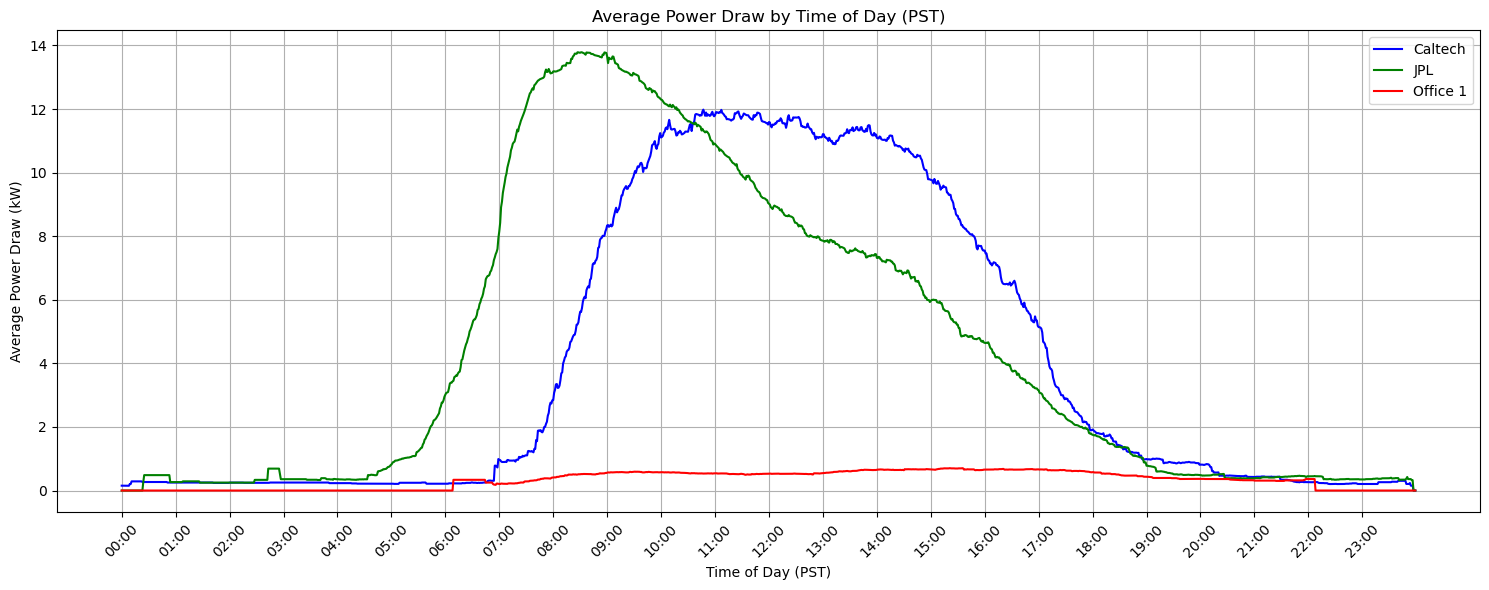

In [14]:
# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot the three energy curves on the same plot
plt.figure(figsize=(15, 6))
plt.plot(range(0,1440),plotter('Data/acndata_sessions 2019_11 till 2020_5 caltech.csv')[0], color='blue', label='Caltech', linewidth=1.5)
plt.plot(range(0,1440),plotter('Data/acndata_sessions 2019_11 till 2020_5 jpl.csv')[0], color='green', label='JPL', linewidth=1.5)
plt.plot(range(0,1440),plotter('Data/acndata_sessions 2019_11 till 2020_5 office1.csv')[0], color='red', label='Office 1', linewidth=1.5)

# Customize the plot
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day (PST)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()